Our phantom directories are ['1749879600', '1749767628', '1750226280', '1749894380', '1750189397', '1750245001', '1749861751', '1750187082', '1749798765', '1749921968', '1750030825', '1749897268', '1749806345', '1750258783', '1749971595', '1750007366', '1749898383', '1749909712', '1749916968', '1750218170', '1749904647', '1749834931', '1750251328', '1750093675', '1749984823', '1750078736', '1749780522', '1750252313', '1749788564', '1749877259', '1750227501', '1749791948', '1749991594', '1750167472', '1750202080', '1749891410', '1749871536', '1750194977', '1749939349', '1749926434', '1750166489', '1750046380', '1749971718', '1749849847', '1750159279', '1749966782', '1749941152', '1750598624', '1749924355', '1750054835', '1749975982', '1749892214', '1750234357', '1750059850', '1749868242', '1750058142', '1749771100', '1750000039', '1750076791', '1749816486', '1749985753', '1750249138', '1749855108', '1750074888', '1749984011', '1750199727', '1749795843', '1749828084', '1750210905', '1750

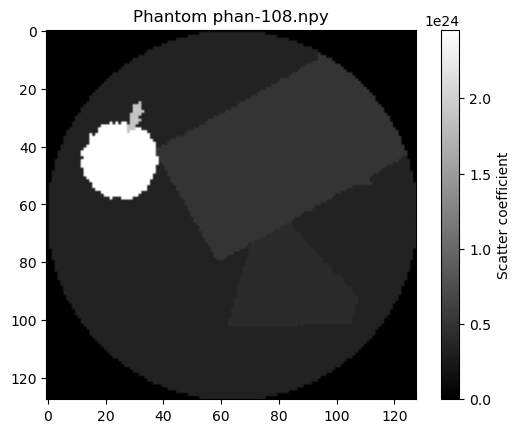

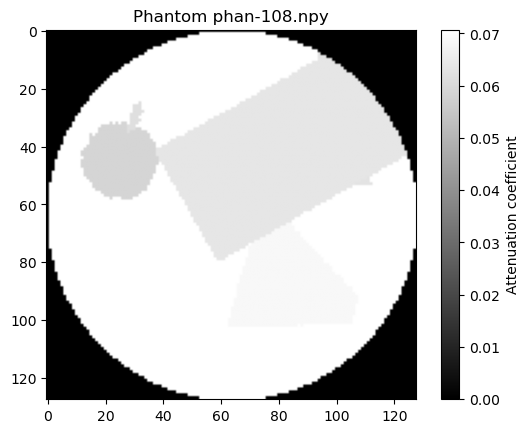

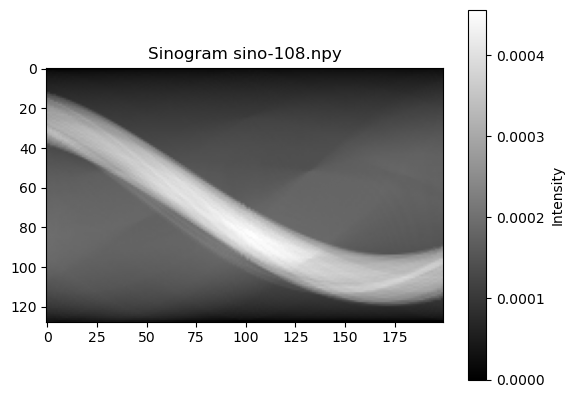

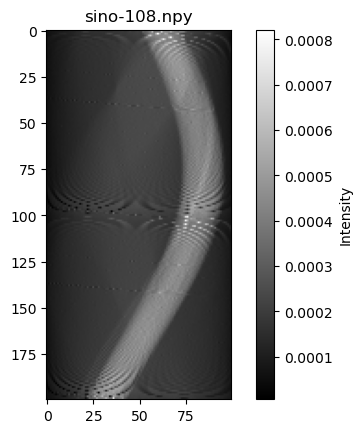

In [19]:
#@title Let's use this notebook to analyse the data we're generating

import numpy as np
import matplotlib.pyplot as plt
import os

# Get all directories within ../data folder
data_dir = '../data'
dirs = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
print(f"Our phantom directories are {dirs}")

# Get all files within a directory
def get_files_in_dir(dir_name):
    return [f for f in os.listdir(os.path.join(data_dir, dir_name)) if os.path.isfile(os.path.join(data_dir, dir_name, f))]

# Select random directory, then a random file beginning with "phan"
dir_name = np.random.choice(dirs)
files = get_files_in_dir(dir_name)
phan_file_name = np.random.choice([f for f in files if f.startswith('phan')])
sino_file_name = f"sino-{phan_file_name.split("-")[1].split(".")[0]}.npy"

# Load meta.npy file
meta = np.load(os.path.join(data_dir, dir_name, 'meta.npy'), allow_pickle=True).item()
print(f"Meta data for phantom {dir_name}: {meta}")

# Load the data
phan_data = np.load(os.path.join(data_dir, dir_name, phan_file_name))
# Display the data
plt.imshow(phan_data[0], cmap='gray')
plt.title(f"Phantom {phan_file_name}")
plt.colorbar(label="Scatter coefficient")
plt.show()
plt.imshow(phan_data[1], cmap='gray')
plt.title(f"Phantom {phan_file_name}")
plt.colorbar(label="Attenuation coefficient")
plt.show()

# Load the data
sino_data = np.load(os.path.join(data_dir, dir_name, sino_file_name))
# Display the data
plt.imshow(np.sum(sino_data, axis=2), cmap='gray')
plt.title(f"Sinogram {sino_file_name}")
plt.colorbar(label="Intensity")
plt.show()


plt.imshow(np.sum(sino_data, axis=0), cmap='gray')
plt.title(f"{sino_file_name}")
plt.colorbar(label="Intensity")
plt.show()

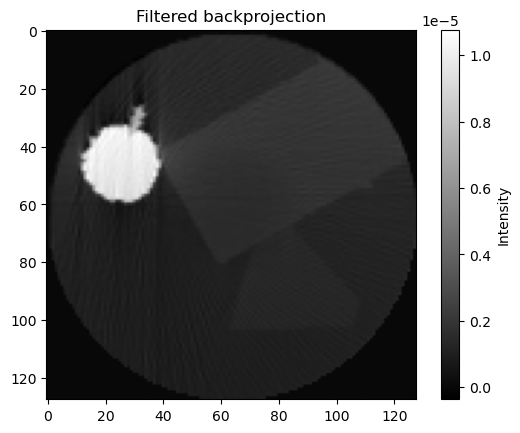

: 

In [ ]:
#@title Let's use some classical reconstruction algorithms to reconstruct the phantom

import numpy as np
from skimage.transform import iradon, iradon_sart

# Filtered backprojection
# P.S. skimage's iradon seems to just do 180 degrees, so we'll just use the first half of the sinogram
recon = iradon(np.sum(sino_data, axis=2)[:,:200], circle=True, filter_name='ramp')

# Display the data
plt.imshow(recon, cmap='gray')
plt.title(f"Filtered backprojection")
plt.colorbar(label="Intensity")
plt.show()

In [ ]:
from material_loader import MaterialLoader

material_loader = MaterialLoader(prop_data_path="/home/samnub/dev/lircst-ana/res/nist_ele_prop.json", 
                                 atten_data_path="/home/samnub/dev/lircst-ana/res/nist_ele_atten.json",
                                 prop_comp_data_path="/home/samnub/dev/lircst-ana/res/nist_comp_prop.json",
                                 atten_comp_data_path="/home/samnub/dev/lircst-ana/res/nist_comp_atten.json",)
# Load the properties
names = material_loader.get_all_material_names()
print(f"Material names: {names}")
name = "Bone, Cortical (ICRU-44)" # prop_loader.get_random_material_name()
prop_datum = material_loader.get_prop_data(name)
print(f"Properties for name {name}: {prop_datum}")
print(f"Electron density for name {name}: {material_loader.calc_electron_density(name, is_per_mole=True)}")
atten_datum = material_loader.get_atten_data(name)
print(f"Attenuation data for name {name}: {atten_datum}, entries: {len(atten_datum)}")
MeV = 1
coeff = material_loader.calc_mass_atten_coeff_at_energy(name, MeV)
print(f"Mass attenuation coefficient for name {name} at {MeV} MeV: {coeff}")


Material names: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', 'Nothing', 'A-150 Tissue-Equivalent Plastic', 'Adipose Tissue (ICRU-44)', 'Air, Dry (near sea level)', 'Alanine', 'B-100 Bone-Equivalent Plastic', 'Bakelite', 'Blood, Whole (ICRU-44)', 'Bone, Cortical (ICRU-44)', 'Brain, Grey/White Matter (ICRU-44)', 'Breast Tissue (ICRU-44)', 'C-552 Air-equivalent Plastic', 'Cadmium Telluride', 'Calcium Fluoride', 'Calcium Sulfate', '15 mmol L-1 Ceric Ammonium Sulfate Solution', 'Cesium Iodide', 'Concr

: 